# 데이터셋 준비
로이터에서 제공하는 뉴스와이어 데이터셋을 이용하겠습니다. 이 데이터셋은 총 11,228개의 샘플로 구성되어 있습니다. 라벨은 46개 주제로 지정되어 0에서 45의 값을 가지고 있습니다. 케라스에서 제공하는 reuters의 load_data() 함수을 이용하면 데이터셋을 쉽게 얻을 수 있습니다. 데이터셋은 이미 정수로 인코딩되어 있으며, 정수값은 단어의 코드번호를 나타냅니다. 모든 단어를 고려할 수 없으므로 빈도수가 높은 단어를 위주로 데이터셋을 생성합니다. 15,000번째로 많이 사용하는 단어까지만 데이터셋으로 만들고 싶다면, num_words 인자에 15000이라고 지정하면 됩니다.

In [0]:

## 필요한 라이브러리 부르기
from keras.datasets import reuters; from keras.utils import np_utils; from keras.preprocessing import sequence
from keras.models import Sequential; from keras.layers import Dense, Embedding; from keras.layers import Flatten

max_features = 15000
text_max_words = 120   ## 처음 120 단어만 살펴봄
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)


# 데이터 정리하기
훈련셋 8,982개와 시험셋 2,246개로 구성된 총 11,228개 샘플이 로딩이 됩니다. 훈련셋과 시험셋의 비율은 load_data() 함수의 test_split 인자로 조절 가능합니다. 각 샘플은 뉴스 한 건을 의미하며, 단어의 인덱스로 구성되어 있습니다. 훈련셋 8,982개 중 다시 7,000개을 훈련셋으로 나머지를 검증셋으로 분리합니다. 처음 120단어만 남기고 삭제합니다. (부족한 경우는 0으로 패딩) .
.

In [58]:
# 훈련셋과 검증셋 분리
x_val = x_train[7000:]; y_val = y_train[7000:]
x_train = x_train[:7000]; y_train = y_train[:7000]
print(x_train[0])


# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


# 모델설정과 학습실행

In [0]:
EPOCH=7   # 학습횟수 지정
BATCH=512




In [65]:
# 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH, validation_data=(x_val, y_val))


Train on 7000 samples, validate on 1982 samples
Epoch 1/7
7000/7000 [==============================] - 6s 868us/step - loss: 2.6973 - acc: 0.3870 - val_loss: 2.0821 - val_acc: 0.4778
Epoch 2/7
7000/7000 [==============================] - 5s 752us/step - loss: 1.8275 - acc: 0.5143 - val_loss: 1.7576 - val_acc: 0.5333
Epoch 3/7
7000/7000 [==============================] - 5s 745us/step - loss: 1.4101 - acc: 0.6384 - val_loss: 1.5588 - val_acc: 0.6115
Epoch 4/7
7000/7000 [==============================] - 5s 754us/step - loss: 1.0352 - acc: 0.7641 - val_loss: 1.4469 - val_acc: 0.6539
Epoch 5/7
7000/7000 [==============================] - 5s 754us/step - loss: 0.6751 - acc: 0.8647 - val_loss: 1.3759 - val_acc: 0.6736
Epoch 6/7
7000/7000 [==============================] - 5s 777us/step - loss: 0.3848 - acc: 0.9299 - val_loss: 1.3717 - val_acc: 0.6821
Epoch 7/7
7000/7000 [==============================] - 5s 747us/step - loss: 0.2097 - acc: 0.9554 - val_loss: 1.3710 - val_acc: 0.6867


# 학습과정 시각화

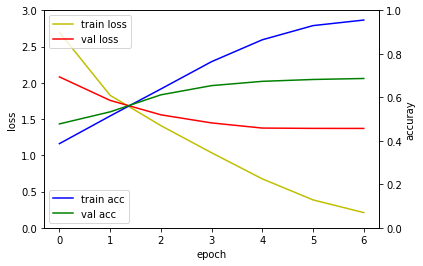

2246/2246 [==============================] - 1s 286us/step
## evaluation loss and_metrics ##
[1.410482920182144, 0.6696349065004452]


In [66]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)
#EOF)